# Interaction Energy with different optimizers
Now we will plot the energy values of the simulation performed with different bases and different optimizers. Since we parallelized the program with respect to the distances, it may happen that a process finished before another one that started before, i.e. we may find the energies in the wrong order in the file

In [104]:
import os

# List of input file paths
file_paths_LiH = [
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_ADAM_22-6-2025_16_44_20.txt'
]

for path in file_paths_LiH:
    with open(path, 'r') as f:
        lines = f.readlines()

    # Keep header or malformed lines separately if needed
    valid_lines = []
    header_lines = []

    for line in lines:
        tokens = line.split()
        if len(tokens) == 0:
            header_lines.append(line)
            continue
        elif tokens[0] == 'Total':
            header_lines.append(line.rstrip() + '\n')
            continue
        try:
            float(tokens[0])  # Validate first token is a number
            valid_lines.append(line)
        except ValueError:
            header_lines.append(line)

    # Sort valid lines by the first token (converted to float)
    sorted_lines = sorted(valid_lines, key = lambda line: float(line.split()[0]))

    # Combine with headers (on top)
    final_lines = header_lines + sorted_lines

    # Output file path
    new_path = path.replace('.txt', '_sorted.txt')

    # Write to new file
    # with open(new_path, 'w') as f:
    #     f.writelines(final_lines)

    # print(f"Sorted file written to: {new_path}")

    with open(path, 'w') as f:
        f.writelines(final_lines)

    print(f"Sorted file written to: {path}")


Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_631g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_631g_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_ADAM_22-6-2025_16_44_20.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_pari

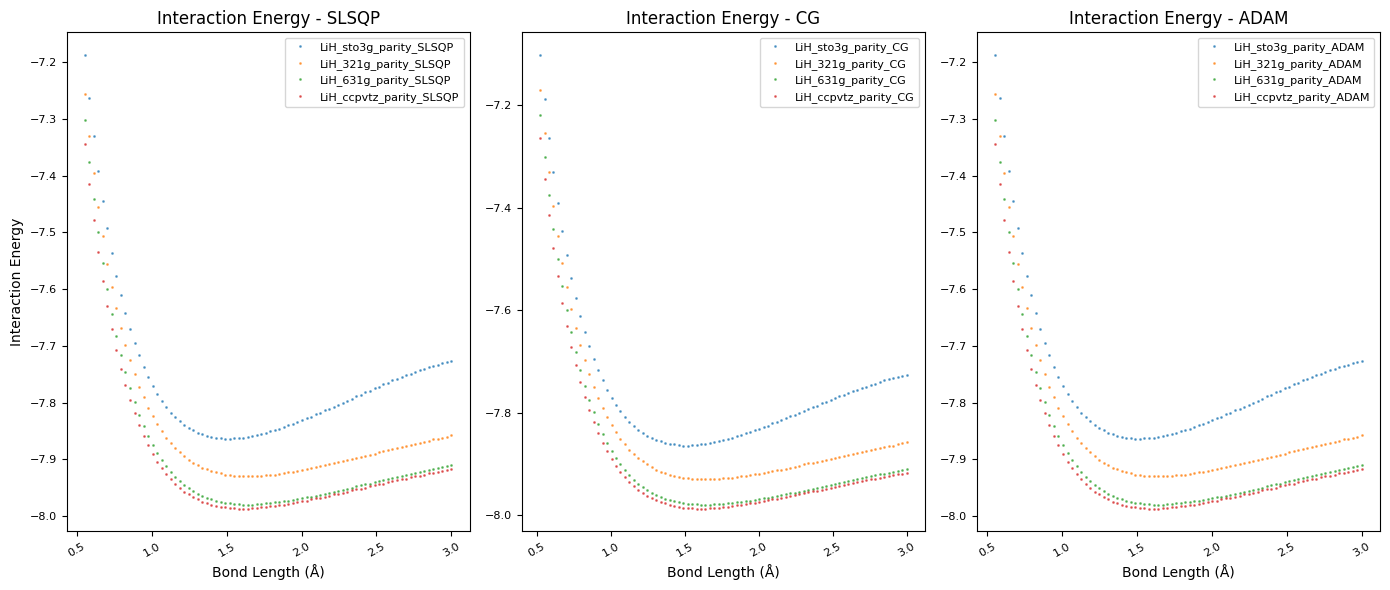

In [105]:
import matplotlib.pyplot as plt
import os

title = 'Interaction Energy'
optimizer_list = ['SLSQP', 'CG', 'ADAM']

energies_LiH = {}
q_eigenval_LiH = {}
c_eigenval_LiH = {}
distances_LiH = {}

fig, axes = plt.subplots(1, 3, figsize = (14, 6))
# Parse data from each file
for i, optimizer in enumerate(optimizer_list):
    # Process 4 files per optimizer (files i*4 to i*4+3)
    start_idx = i * 4
    end_idx = start_idx + 4
    
    for path in file_paths_LiH[start_idx:end_idx]:
        filename = os.path.basename(path)
       
        # Extract basis from filename
        parts = filename.split('_')
        molecule        = parts[1]
        basis           = parts[2]
        mapper          = parts[3]
        optimizer_name  = parts[4]
        
        key = f"{molecule}_{basis}_{mapper}_{optimizer_name}"
        
        energies_LiH[key] = []
        q_eigenval_LiH[key] = []
        c_eigenval_LiH[key] = []
        distances_LiH[key] = []
        
        with open(path, 'r') as file:
            for line in file:
                tokens = line.split()
                if len(tokens) > 11 and tokens[0] != 'Total':
                    try:
                        distances_LiH[key].append(float(tokens[0]))
                        energies_LiH[key].append(round(float(tokens[5]), 3))
                        q_eigenval_LiH[key].append(round(float(tokens[7].rstrip(')')), 10))
                        c_eigenval_LiH[key].append(round(float(tokens[11]), 10))
                    except (ValueError, IndexError):
                        continue

    # Debug purposes
    # if i == 2:
    #     check = True
    
    # Plotting for the current optimizer
    for key in energies_LiH:
        if optimizer in key:
            skip = 17
            d = distances_LiH[key][skip:]
            e = energies_LiH[key][skip:]
            
            # Create a cleaner label (just the basis name)
            basis_name = key.split('_')[1]  # Extract basis from key
            axes[i].plot(d, e, 'o', markersize = 1, alpha = 0.6, label = f'{molecule}_{basis_name}_{mapper}_{optimizer}')
    
    axes[i].set_title(f"{title} - {optimizer}")
    axes[i].set_xlabel("Bond Length (Å)")
    if i == 0:
        axes[i].set_ylabel(f"{title}")
    axes[i].tick_params(axis = 'x', labelsize = 8, rotation = 30)
    axes[i].tick_params(axis = 'y', labelsize = 8)
    axes[i].legend(fontsize = 8)

plt.tight_layout()
plt.show()


Collecting Li2 and H2 energies at high distance (1e4)

In [106]:
import os

# List of input file paths
file_paths_Li2H2 = [
    '/home/tommi/venvs/outputLi2H2/results_H2_sto3g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_321g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_631g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_ccpvtz_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_sto3g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_321g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_631g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_ccpvtz_parity_SLSQP_26-6-2025_10_57_59.txt', ########
    '/home/tommi/venvs/outputLi2H2/results_H2_sto3g_parity_CG_1-7-2025_12_21_47.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_321g_parity_CG_1-7-2025_12_21_47.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_631g_parity_CG_1-7-2025_12_21_47.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_ccpvtz_parity_CG_1-7-2025_12_21_47.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_sto3g_parity_CG_1-7-2025_12_21_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_321g_parity_CG_1-7-2025_12_21_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_631g_parity_CG_1-7-2025_12_21_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_ccpvtz_parity_CG_1-7-2025_12_21_20.txt', ##########    
    '/home/tommi/venvs/outputLi2H2/results_H2_sto3g_parity_ADAM_1-7-2025_13_20_19.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_321g_parity_ADAM_1-7-2025_13_20_19.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_631g_parity_ADAM_1-7-2025_13_20_19.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_ccpvtz_parity_ADAM_1-7-2025_13_20_19.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_sto3g_parity_ADAM_1-7-2025_12_22_17.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_321g_parity_ADAM_1-7-2025_12_22_17.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_631g_parity_ADAM_1-7-2025_12_22_17.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_ccpvtz_parity_ADAM_1-7-2025_12_22_17.txt'
]

energies_Li2H2 = {}
q_eigenval_Li2H2 = {}
c_eigenval_Li2H2 = {}
for path in file_paths_Li2H2:
    filename = os.path.basename(path)
    
    # Extract basis from filename (assumes format: results_<basis>_<mapper>_<time>.txt)
    parts     = filename.split('_')
    molecule  = parts[1]
    basis     = parts[2]
    mapper    = parts[3]
    optimizer = parts[4]

    key =  molecule + '_' + basis  + '_' + mapper + '_' + optimizer

    energies_Li2H2[key] = 0
    q_eigenval_Li2H2[key] = 0
    c_eigenval_Li2H2[key] = 0

    with open(path, 'r') as file:
        for line in file:
            tokens = line.split()
            if len(tokens) > 4 and tokens[0] != 'Total':
                try:
                    energies_Li2H2[key] = round(float(tokens[2]), 5)
                    q_eigenval_Li2H2[key] = round(float(tokens[4].rstrip(')')), 5)
                    c_eigenval_Li2H2[key] = round(float(tokens[8].strip('+j0)').lstrip('(')), 5)

                except ValueError:
                    continue  # skip invalid lines

# print(energies_Li2H2, q_eigenval_Li2H2, c_eigenval_Li2H2)


Calculation of H and Li ground state, i.e. division by 2 of the previously fetched values

In [107]:
gs_energy = {}

for key in energies_Li2H2:
    gs_energy[key] = energies_Li2H2[key] / 2

for key in gs_energy:
    print(f"Single atom ground state energy is ({key}): {gs_energy[key]}")

# print(energies_Li2H2)

Single atom ground state energy is (H2_sto3g_parity_SLSQP): -0.46658
Single atom ground state energy is (H2_321g_parity_SLSQP): -0.487135
Single atom ground state energy is (H2_631g_parity_SLSQP): -0.488125
Single atom ground state energy is (H2_ccpvtz_parity_SLSQP): -0.48405
Single atom ground state energy is (Li2_sto3g_parity_SLSQP): -7.182825
Single atom ground state energy is (Li2_321g_parity_SLSQP): -7.37797
Single atom ground state energy is (Li2_631g_parity_SLSQP): -7.32197
Single atom ground state energy is (Li2_ccpvtz_parity_SLSQP): -7.32731
Single atom ground state energy is (H2_sto3g_parity_CG): -0.46658
Single atom ground state energy is (H2_321g_parity_CG): -0.487135
Single atom ground state energy is (H2_631g_parity_CG): -0.488125
Single atom ground state energy is (H2_ccpvtz_parity_CG): -0.48135
Single atom ground state energy is (Li2_sto3g_parity_CG): -7.315515
Single atom ground state energy is (Li2_321g_parity_CG): -7.278795
Single atom ground state energy is (Li2_631

Now we have found the ground state of the single atoms. Theoretically, the sum of the single atom energies is higher than the molecule energy. Let's see if this is the case. In order to simplify the analysis, we are creating a new dictionary where each key is a basis and the elements are the the H2 and Li2

In [108]:
energy_dict = {}
for key in gs_energy:
    parts = key.split('_')

    molecule = parts[0]
    new_key = parts[1] + '_' + parts[3]
    # creating a dictionary where each key is a basis
    if new_key not in energy_dict:
        energy_dict[new_key] = {'H2': 0, 'Li2': 0}

    try:
        if energy_dict[new_key][molecule] == 0:
            energy_dict[new_key][molecule] = gs_energy[key]
    except:
        print(f"Error at iteration: {new_key}")

print(f"Simple riorganization of the keys in the dictionary:\n\n{energy_dict}\n\nValue are identical to the previous print")

Simple riorganization of the keys in the dictionary:

{'sto3g_SLSQP': {'H2': -0.46658, 'Li2': -7.182825}, '321g_SLSQP': {'H2': -0.487135, 'Li2': -7.37797}, '631g_SLSQP': {'H2': -0.488125, 'Li2': -7.32197}, 'ccpvtz_SLSQP': {'H2': -0.48405, 'Li2': -7.32731}, 'sto3g_CG': {'H2': -0.46658, 'Li2': -7.315515}, '321g_CG': {'H2': -0.487135, 'Li2': -7.278795}, '631g_CG': {'H2': -0.488125, 'Li2': -7.428155}, 'ccpvtz_CG': {'H2': -0.48135, 'Li2': -7.327625}, 'sto3g_ADAM': {'H2': -0.46658, 'Li2': -7.315515}, '321g_ADAM': {'H2': -0.487135, 'Li2': -7.279055}, '631g_ADAM': {'H2': -0.488125, 'Li2': -7.428175}, 'ccpvtz_ADAM': {'H2': -0.481315, 'Li2': -7.327545}}

Value are identical to the previous print


Let's now sum the energy associated to each basis atom and see if it is lower than the molecule LiH (we will compare these values with the minimum of the curve previously obtained)

In [109]:
import numpy as np

en_min_LiH = {}
for key in energies_LiH:
    parts = key.split('_')

    new_key = parts[1] + '_' + parts[3]
    # creating a dictionary where each key is a basis + ootimizer
    en_min_LiH[new_key] = energies_LiH[key]

min_vals = {}
for key in en_min_LiH:
    min_val = min(en_min_LiH[key])

    idx = en_min_LiH[key].index(min_val)
    # print(idx)

    min_vals[key] = (min_val, idx)

# print(min_vals)

energy_sum = {}
for key in energy_dict:
    if key not in energy_sum:
        energy_sum[key] = sum(energy_dict[key].values())

# print(energy_sum)

start = 0.01
end = 3
steps = 100
d = np.linspace(start, end, steps)
for key in energy_sum:
    if energy_sum[key] > min_vals[key][0]: print(f'{key} ---\n Sum of the energies {energy_sum[key]} > (Molecule energy, index) {min_vals[key]}, distance value at such index: {d[min_vals[key][1]]} Å\n')


sto3g_SLSQP ---
 Sum of the energies -7.649405 > (Molecule energy, index) (-7.864, 48), distance value at such index: 1.45969696969697 Å

321g_SLSQP ---
 Sum of the energies -7.865105000000001 > (Molecule energy, index) (-7.93, 52), distance value at such index: 1.5805050505050506 Å

631g_SLSQP ---
 Sum of the energies -7.8100950000000005 > (Molecule energy, index) (-7.98, 52), distance value at such index: 1.5805050505050506 Å

ccpvtz_SLSQP ---
 Sum of the energies -7.81136 > (Molecule energy, index) (-7.987, 51), distance value at such index: 1.5503030303030305 Å

sto3g_CG ---
 Sum of the energies -7.782095 > (Molecule energy, index) (-7.864, 49), distance value at such index: 1.48989898989899 Å

321g_CG ---
 Sum of the energies -7.76593 > (Molecule energy, index) (-7.93, 53), distance value at such index: 1.610707070707071 Å

631g_CG ---
 Sum of the energies -7.91628 > (Molecule energy, index) (-7.98, 53), distance value at such index: 1.610707070707071 Å

ccpvtz_CG ---
 Sum of the 

where the index printed are the position in the list where the minimum lies (such index is used to find the distance between the atoms).

We have obtained that, whatever the basis used for the simulation, the overall molecule is more stable (i.e. ground state has lower energy) than the two atoms isolated. The binding energy is defined as the difference between the ground state between the two atoms and the molecule

In [110]:
binding_en = {}
for key in energy_sum:
    if key not in binding_en:
        binding_en[key] = energy_sum[key] - min_vals[key][0]

for key in binding_en:
    print(f"Binding energy {key}: {binding_en[key]}")

Binding energy sto3g_SLSQP: 0.2145950000000001
Binding energy 321g_SLSQP: 0.06489499999999904
Binding energy 631g_SLSQP: 0.16990499999999997
Binding energy ccpvtz_SLSQP: 0.17564000000000046
Binding energy sto3g_CG: 0.0819049999999999
Binding energy 321g_CG: 0.16406999999999972
Binding energy 631g_CG: 0.06372
Binding energy ccpvtz_CG: 0.17802499999999988
Binding energy sto3g_ADAM: 0.0819049999999999
Binding energy 321g_ADAM: 0.1638099999999998
Binding energy 631g_ADAM: 0.06369999999999987
Binding energy ccpvtz_ADAM: 0.17813999999999997


Since the scientific [reference](https://indico.in2p3.fr/event/2481/contributions/24469/attachments/19766/24292/ID_72_poster_A0.pdf) we have is checking at the distance of 1.64 Å, let us see at that length how the energy behaves

In [111]:
# print(d)

d_round = np.round(d, 2)
# print(d_round)

val = 1.64
idx = np.where(d_round == val)[0]
print(idx)

for key in en_min_LiH:
    print(f"{key}: {en_min_LiH[key][idx[0]]}")

[54]
sto3g_SLSQP: -7.859
321g_SLSQP: -7.93
631g_SLSQP: -7.98
ccpvtz_SLSQP: -7.986
sto3g_CG: -7.861
321g_CG: -7.93
631g_CG: -7.98
ccpvtz_CG: -7.987
sto3g_ADAM: -7.859
321g_ADAM: -7.93
631g_ADAM: -7.98
ccpvtz_ADAM: -7.986


We can see that the values are essentially coincident with the ones found with the min() function. In fact, the index changes just by 3 or 4 digits

# Classical v. Quantum eigenvalue plot
We have calculated via the VQE and the NumpyEigensolver the eigenvalue associated to the specific distance between the molecules of Li and H. Let us now plot them and see whether there are differences or not

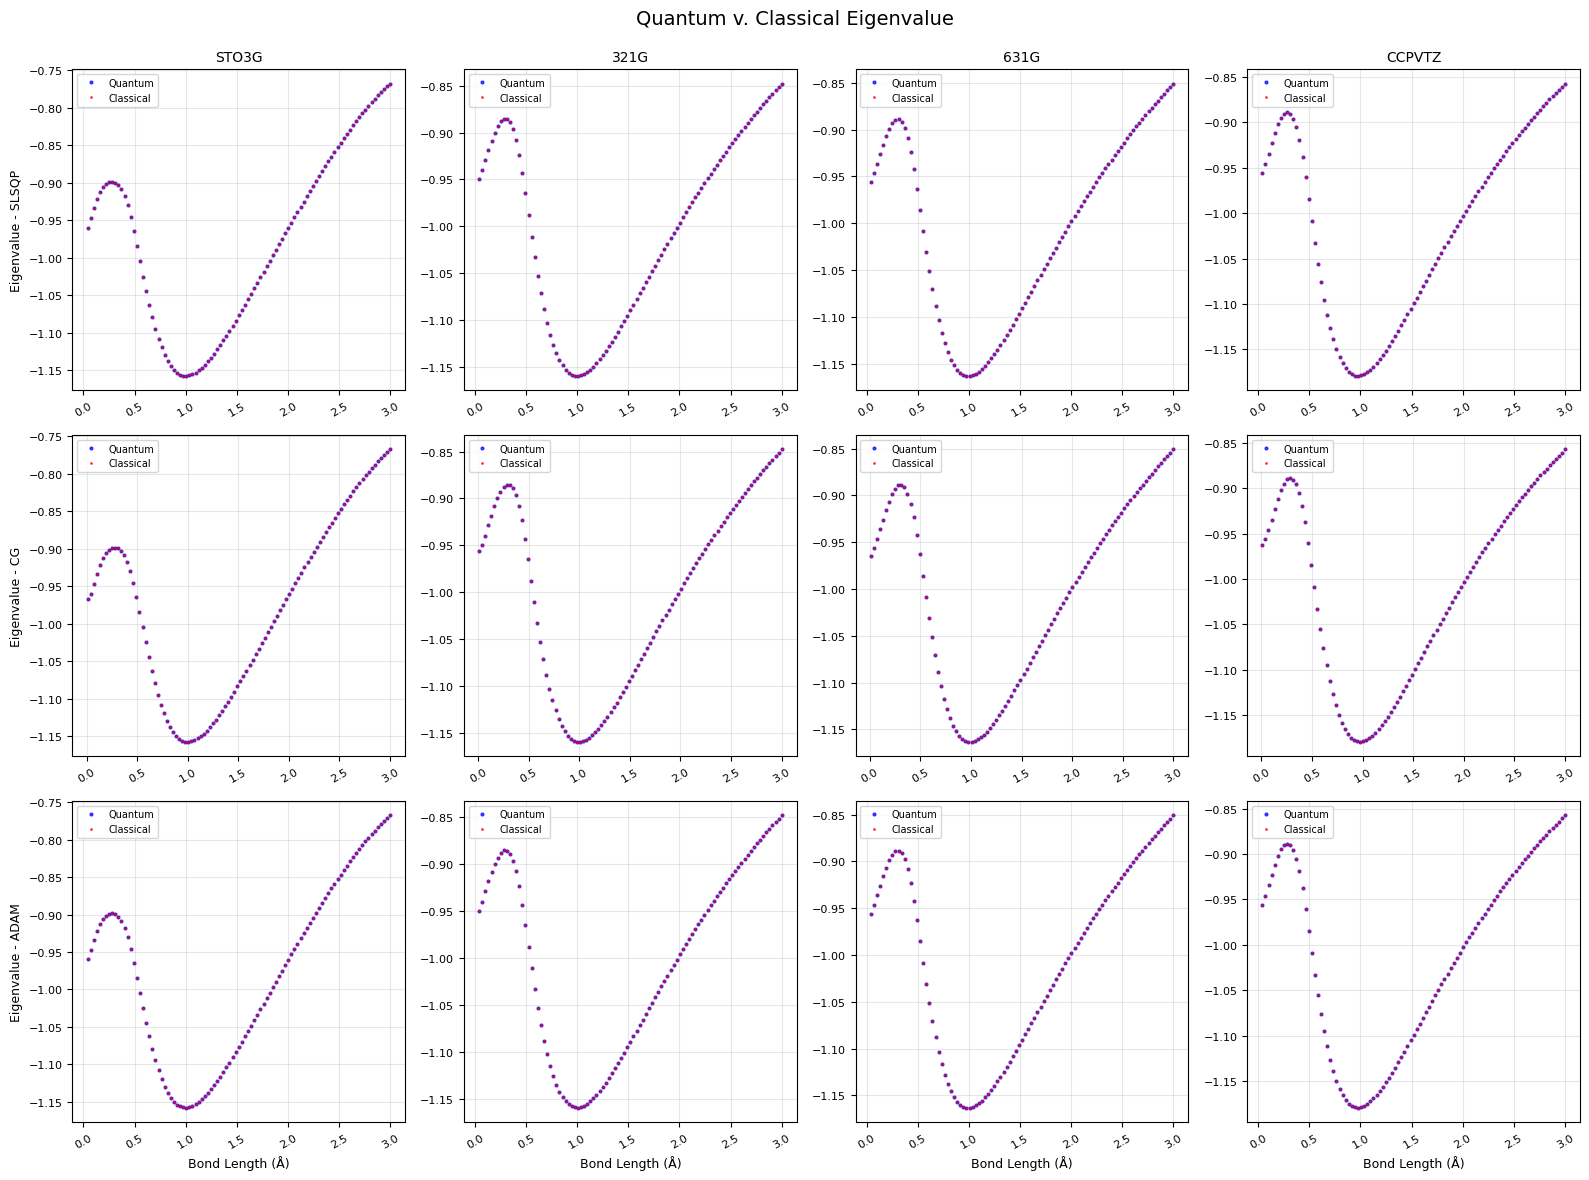

Available simulation keys:
  LiH_321g_parity_ADAM
  LiH_321g_parity_CG
  LiH_321g_parity_SLSQP
  LiH_631g_parity_ADAM
  LiH_631g_parity_CG
  LiH_631g_parity_SLSQP
  LiH_ccpvtz_parity_ADAM
  LiH_ccpvtz_parity_CG
  LiH_ccpvtz_parity_SLSQP
  LiH_sto3g_parity_ADAM
  LiH_sto3g_parity_CG
  LiH_sto3g_parity_SLSQP


In [112]:
title = 'Quantum v. Classical Eigenvalue'
optimizer_list = ['SLSQP', 'CG', 'ADAM']
basis_list = ['sto3g', '321g', '631g', 'ccpvtz']

# Create a 3x4 grid (3 optimizers x 4 basis sets)
fig, axes = plt.subplots(len(optimizer_list), len(basis_list), figsize = (16, 12))

# Ensure axes is always 2D for consistent indexing
if len(optimizer_list) == 1:
    axes = axes.reshape(1, -1)
if len(basis_list) == 1:
    axes = axes.reshape(-1, 1)

# Iterate through optimizers (rows)
for opt_idx, optimizer in enumerate(optimizer_list):
    # Iterate through basis sets (columns)
    for basis_idx, basis in enumerate(basis_list):
        
        # Find the matching simulation key
        matching_key = None
        for simulation_key in q_eigenval_LiH.keys():
            parts = simulation_key.split('_')
            if len(parts) >= 4:
                key_molecule = parts[0]
                key_basis = parts[1]
                key_mapper = parts[2]
                key_optimizer = parts[3]
                
                # Check if this key matches current optimizer and basis
                if key_optimizer == optimizer and key_basis == basis:
                    matching_key = simulation_key
                    break
        
        # If we found a matching simulation, plot it
        if matching_key:
            skip = 0
            d = distances_LiH[matching_key][skip:]
            eq = q_eigenval_LiH[matching_key][skip:]
            ec = c_eigenval_LiH[matching_key][skip:]
            
            # Plot quantum and classical eigenvalues
            axes[opt_idx][basis_idx].plot(d, eq, 'o', markersize = 2, alpha = 0.7, label = 'Quantum', color = 'blue')
            axes[opt_idx][basis_idx].plot(d, ec, 'o', markersize = 1, alpha = 0.7, label = 'Classical', color = 'red')
            
            # Set title for each subplot
            if opt_idx == 0:
                axes[opt_idx][basis_idx].set_title(f"{basis.upper()}", fontsize = 10)
            
            # Set labels
            if basis_idx == 0:  # Only leftmost column gets y-label
                axes[opt_idx][basis_idx].set_ylabel(f"Eigenvalue - {optimizer}", fontsize = 9)
            if opt_idx == len(optimizer_list) - 1:  # Only bottom row gets x-label
                axes[opt_idx][basis_idx].set_xlabel("Bond Length (Å)", fontsize = 9)
            
            # Formatting
            axes[opt_idx][basis_idx].tick_params(axis = 'x', labelsize = 8, rotation = 30)
            axes[opt_idx][basis_idx].tick_params(axis = 'y', labelsize = 8)
            axes[opt_idx][basis_idx].legend(fontsize = 7)
            axes[opt_idx][basis_idx].grid(True, alpha = 0.3)

# Add overall title
fig.suptitle(title, fontsize = 14, y = 0.98)

plt.tight_layout()
plt.subplots_adjust(top = 0.93)  # Make room for the main title
plt.show()

# Optional: Print available simulation keys for debugging
print("Available simulation keys:")
for key in sorted(q_eigenval_LiH.keys()):
    print(f"  {key}")

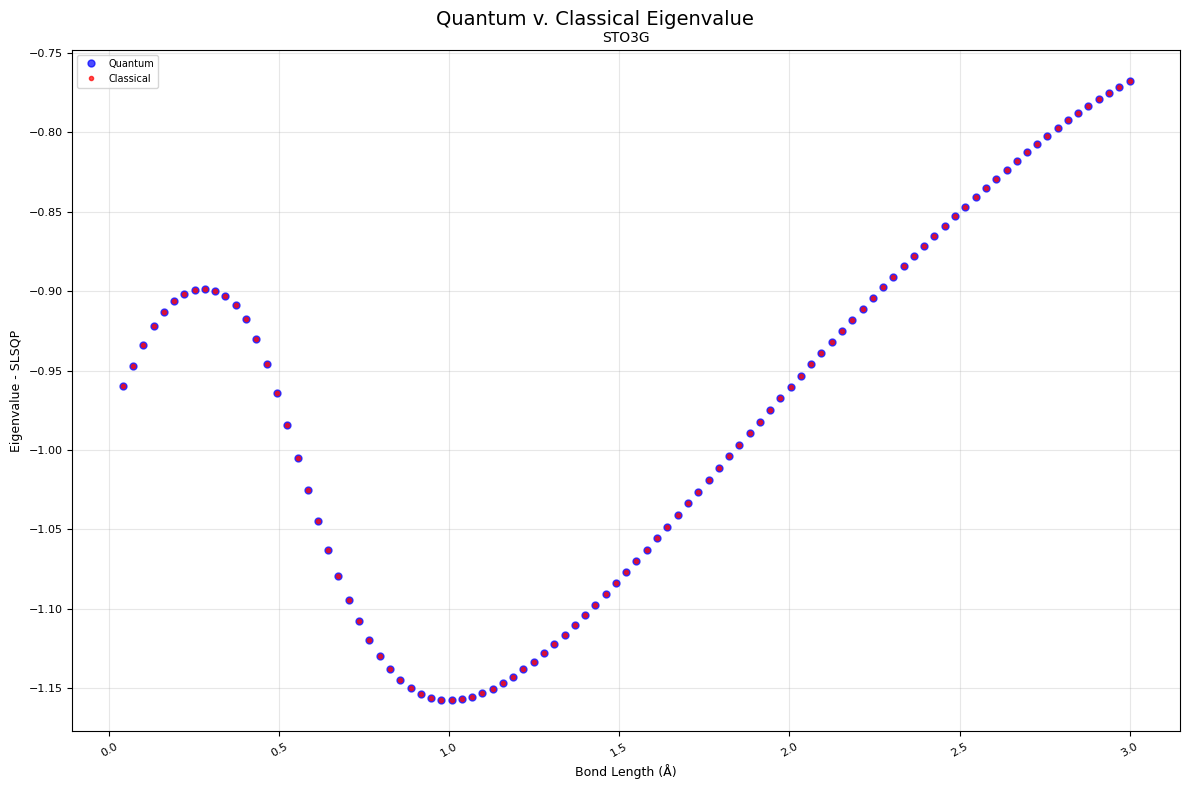

In [113]:
optimizer_list = ['SLSQP']
basis_list = ['sto3g']

# Create a 3x4 grid (3 optimizers x 4 basis sets)
fig, axes = plt.subplots(len(optimizer_list), len(basis_list), figsize = (12, 8))

# Handle different axes shapes for consistent 2D indexing
if len(optimizer_list) == 1 and len(basis_list) == 1:
    # Single subplot case
    axes = [[axes]]
elif len(optimizer_list) == 1:
    # Single row case - axes is 1D array
    axes = [axes]
elif len(basis_list) == 1:
    # Single column case - axes is 1D array  
    axes = [[ax] for ax in axes]
# If both > 1, axes is already 2D, so no change needed

# Iterate through optimizers (rows)
for opt_idx, optimizer in enumerate(optimizer_list):
    # Iterate through basis sets (columns)
    for basis_idx, basis in enumerate(basis_list):
        
        # Find the matching simulation key
        matching_key = None
        for simulation_key in q_eigenval_LiH.keys():
            parts = simulation_key.split('_')
            if len(parts) >= 4:
                key_molecule = parts[0]
                key_basis = parts[1]
                key_mapper = parts[2]
                key_optimizer = parts[3]
                
                # Check if this key matches current optimizer and basis
                if key_optimizer == optimizer and key_basis == basis:
                    matching_key = simulation_key
                    break
        
        # If we found a matching simulation, plot it
        if matching_key:
            skip = 0
            d = distances_LiH[matching_key][skip:]
            eq = q_eigenval_LiH[matching_key][skip:]
            ec = c_eigenval_LiH[matching_key][skip:]
            
            # Plot quantum and classical eigenvalues
            axes[opt_idx][basis_idx].plot(d, eq, 'o', markersize = 5, alpha = 0.7, label = 'Quantum', color = 'blue')
            axes[opt_idx][basis_idx].plot(d, ec, 'o', markersize = 3, alpha = 0.7, label = 'Classical', color = 'red')
            
            # Set title for each subplot
            if opt_idx == 0:
                axes[opt_idx][basis_idx].set_title(f"{basis.upper()}", fontsize = 10)
            
            # Set labels
            if basis_idx == 0:  # Only leftmost column gets y-label
                axes[opt_idx][basis_idx].set_ylabel(f"Eigenvalue - {optimizer}", fontsize = 9)
            if opt_idx == len(optimizer_list) - 1:  # Only bottom row gets x-label
                axes[opt_idx][basis_idx].set_xlabel("Bond Length (Å)", fontsize = 9)
            
            # Formatting
            axes[opt_idx][basis_idx].tick_params(axis = 'x', labelsize = 8, rotation = 30)
            axes[opt_idx][basis_idx].tick_params(axis = 'y', labelsize = 8)
            axes[opt_idx][basis_idx].legend(fontsize = 7)
            axes[opt_idx][basis_idx].grid(True, alpha = 0.3)

# Add overall title
fig.suptitle(title, fontsize = 14, y = 0.98)

plt.tight_layout()
plt.subplots_adjust(top = 0.93)  # Make room for the main title
plt.show()


We can see that, in this case as well in the others, the overall difference between the classical and the quantum eigenvalue is minimal. Let us see the difference between these two in order to evaluate how much these two differ

In [114]:
for idx, (c, q) in enumerate(zip(ec, eq)):
    print(f"Iteration {idx}: {c - q}")

Iteration 0: -1.5069999992345373e-07
Iteration 1: -1.000000082740371e-10
Iteration 2: -7.319999995036852e-08
Iteration 3: -2.6499999972173782e-08
Iteration 4: -3.290000005762295e-08
Iteration 5: -2.2799999999101317e-08
Iteration 6: -8.80000006198145e-09
Iteration 7: -1.8589999994933493e-07
Iteration 8: -2.868999999794397e-07
Iteration 9: -2.430000000108734e-07
Iteration 10: -4.510000006785475e-08
Iteration 11: -4.4280000000007647e-07
Iteration 12: -1.126999999989664e-07
Iteration 13: -3.7019999998832986e-07
Iteration 14: -4.628999999978234e-07
Iteration 15: -6.059999990704057e-08
Iteration 16: -1.6300000016400418e-08
Iteration 17: -5.569999994570196e-08
Iteration 18: -1.000000082740371e-10
Iteration 19: -6.649999995111955e-08
Iteration 20: -3.830000006033174e-08
Iteration 21: -6.4000000854491645e-09
Iteration 22: -3.2389999993220897e-07
Iteration 23: -1.5999999103399887e-09
Iteration 24: -1.4149999993939844e-07
Iteration 25: -1.1830000001822327e-07
Iteration 26: -3.000000248221113e-10
